# 01 — Exploratory Data Analysis (EDA)

Course: **Machine Learning and Artificial Intelligence for Astronomy**  
Dataset: **NASA Exoplanet Archive export** (`nea_2026_jan.csv`)

**Goals**
- Understand the structure, quality, and limitations of an exoplanet catalog
- Diagnose missing values, ranges, correlations, and outliers **before** modeling

⚠️ In this notebook we **do not** impute, normalize, or select features. We only **diagnose**.


## 0. Setup
Import the minimal EDA toolkit.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Plot settings (simple + readable)
plt.rcParams["figure.dpi"] = 120
sns.set_context("notebook")


## 1. Load the dataset

The notebook tries a few common locations. Adjust `DATA_PATHS` if needed.


In [26]:
# Try a few common locations relative to this notebook
DATA_PATHS = [
    Path("../data/nea_2026_jan.csv"),
]

data_path = next((p for p in DATA_PATHS if p.exists()), None)
if data_path is None:
    raise FileNotFoundError(
        "Could not find nea_2026_jan.csv. Tried:\n"
        + "\n".join([str(p) for p in DATA_PATHS])
        + "\n\nEdit DATA_PATHS to match your repository structure."
    )

df = pd.read_csv(data_path)
print(f"Loaded: {data_path}  |  shape={df.shape}")


Loaded: ..\data\nea_2026_jan.csv  |  shape=(6065, 14)


## 2. First look at the data


In [27]:
df.head()


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,pl_eqt,st_teff,st_met
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,323.21000,1.178,NaN,4914.898486,NaN,4874.0,-0.26
1,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,516.21997,1.530,NaN,4684.814200,NaN,4213.0,-0.02
2,14 And b,14 And,1,1,1,Radial Velocity,2008,186.76000,0.775,NaN,1131.151301,NaN,4888.0,-0.21
3,14 Her b,14 Her,1,1,2,Radial Velocity,2002,1765.03890,2.774,NaN,2559.472162,NaN,NaN,NaN
4,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,798.50000,1.660,NaN,565.737400,NaN,5750.0,0.06


In [28]:
df.shape


(6065, 14)

In [29]:
df.columns.tolist()[:40]


['pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'pl_orbper',
 'pl_orbsmax',
 'pl_rade',
 'pl_bmasse',
 'pl_eqt',
 'st_teff',
 'st_met']

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          6065 non-null   object 
 1   hostname         6065 non-null   object 
 2   default_flag     6065 non-null   int64  
 3   sy_snum          6065 non-null   int64  
 4   sy_pnum          6065 non-null   int64  
 5   discoverymethod  6065 non-null   object 
 6   disc_year        6065 non-null   int64  
 7   pl_orbper        5736 non-null   float64
 8   pl_orbsmax       3779 non-null   float64
 9   pl_rade          4523 non-null   float64
 10  pl_bmasse        2980 non-null   float64
 11  pl_eqt           1648 non-null   float64
 12  st_teff          5363 non-null   float64
 13  st_met           4288 non-null   float64
dtypes: float64(7), int64(4), object(3)
memory usage: 663.5+ KB


## 3. Basic descriptive statistics

This is often enough to spot unphysical values and suspicious ranges.


In [31]:
df.describe(include='all').T.head(25)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pl_name,6065,6065,11 Com b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hostname,6065,4524,KOI-351,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default_flag,6065.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
sy_snum,6065.0,NaN,NaN,NaN,1.103875,0.342792,1.0,1.0,1.0,1.0,4.0
sy_pnum,6065.0,NaN,NaN,NaN,1.771641,1.159218,1.0,1.0,1.0,2.0,8.0
discoverymethod,6065,11,Transit,4474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
disc_year,6065.0,NaN,NaN,NaN,2016.869085,4.895209,1992.0,2014.0,2016.0,2021.0,2026.0
pl_orbper,5736.0,NaN,NaN,NaN,4516.752779,164271.567979,0.090706,4.352093,11.125222,39.729264,8040000.0
pl_orbsmax,3779.0,NaN,NaN,NaN,21.70621,415.774309,0.0044,0.053885,0.115,0.8045,19000.0
pl_rade,4523.0,NaN,NaN,NaN,4.444772,4.817516,0.3098,1.62,2.43,4.06,77.3421


## 4. Missing values

Astronomical catalogs are incomplete by construction. Here we **quantify** missingness.


In [32]:
missing = df.isna().sum().sort_values(ascending=False)
missing.head(30)


pl_eqt             4417
pl_bmasse          3085
pl_orbsmax         2286
st_met             1777
pl_rade            1542
st_teff             702
pl_orbper           329
pl_name               0
hostname              0
default_flag          0
sy_snum               0
sy_pnum               0
discoverymethod       0
disc_year             0
dtype: int64

In [33]:
(missing / len(df)).head(30)


pl_eqt             0.728277
pl_bmasse          0.508656
pl_orbsmax         0.376917
st_met             0.292993
pl_rade            0.254246
st_teff            0.115746
pl_orbper          0.054246
pl_name            0.000000
hostname           0.000000
default_flag       0.000000
sy_snum            0.000000
sy_pnum            0.000000
discoverymethod    0.000000
disc_year          0.000000
dtype: float64

### Optional: visualize missingness (sample)

Heatmaps can be heavy for large tables; we subsample rows.


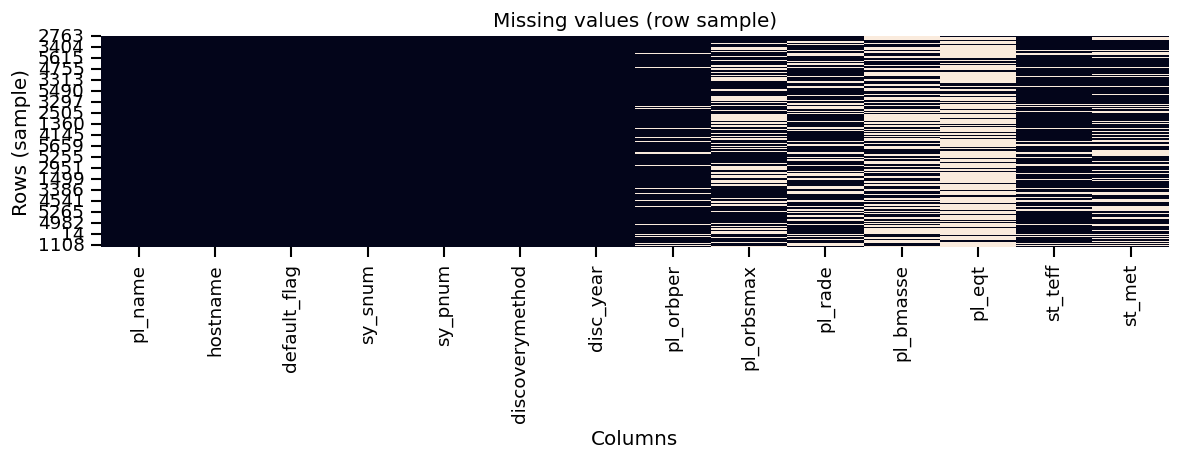

In [34]:
sample = df.sample(n=min(500, len(df)), random_state=42)
plt.figure(figsize=(10, 4))
sns.heatmap(sample.isna(), cbar=False)
plt.title("Missing values (row sample)")
plt.xlabel("Columns")
plt.ylabel("Rows (sample)")
plt.tight_layout()


## 5. Choose key columns for the course

We’ll use the catalog for:
- **Regression:** predict radius from mass (and possibly other features)
- **Classification:** small vs large planets (based on radius threshold)

The NASA Exoplanet Archive uses different column names depending on the query/export.
Set these to match your file.

Common choices:
- Mass (Earth masses): `pl_bmasse`
- Radius (Earth radii): `pl_rade`
- Stellar metallicity: `st_met`


In [35]:
# --- Configure key columns (edit if needed) ---
MASS_COL_CANDIDATES = ["pl_bmasse", "pl_massj", "pl_bmassj", "pl_masse"]
RAD_COL_CANDIDATES  = ["pl_rade", "pl_radj", "pl_radius", "pl_r"]
FEH_COL_CANDIDATES  = ["st_met", "st_fe", "st_feh", "st_metfe"]

def pick_first_existing(cands, columns):
    return next((c for c in cands if c in columns), None)

MASS_COL = pick_first_existing(MASS_COL_CANDIDATES, df.columns)
RAD_COL  = pick_first_existing(RAD_COL_CANDIDATES,  df.columns)
FEH_COL  = pick_first_existing(FEH_COL_CANDIDATES,  df.columns)

MASS_COL, RAD_COL, FEH_COL


('pl_bmasse', 'pl_rade', 'st_met')

If any of these is `None`, pick the correct column by inspecting `df.columns`.


In [36]:
# If needed, uncomment and set manually:
# MASS_COL = "pl_bmasse"
# RAD_COL  = "pl_rade"
# FEH_COL  = "st_met"

assert MASS_COL in df.columns, f"Set MASS_COL correctly. Current: {MASS_COL}"
assert RAD_COL in df.columns,  f"Set RAD_COL correctly. Current: {RAD_COL}"
# FEH_COL is optional


## 6. Univariate distributions

Always label axes with units.


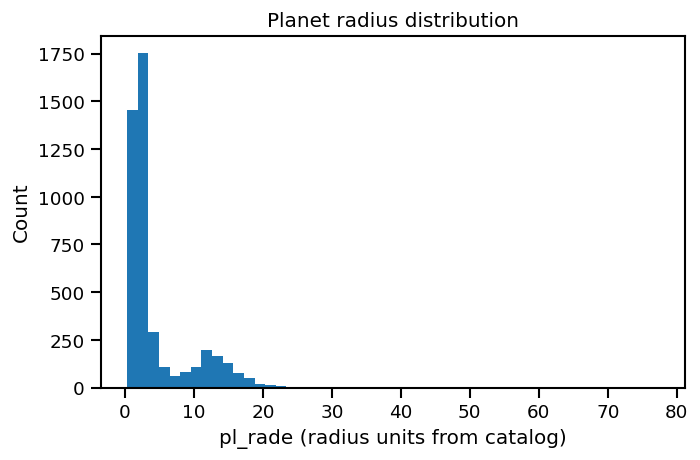

In [37]:
plt.figure(figsize=(6,4))
plt.hist(df[RAD_COL].dropna(), bins=50)
plt.xlabel(f"{RAD_COL} (radius units from catalog)")
plt.ylabel("Count")
plt.title("Planet radius distribution")
plt.tight_layout()


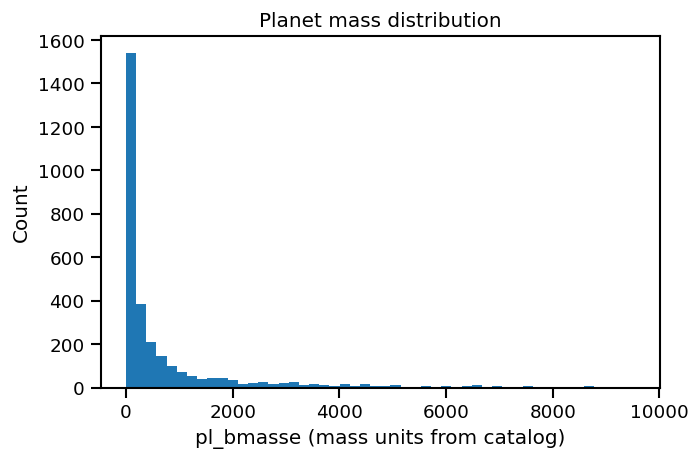

In [38]:
plt.figure(figsize=(6,4))
plt.hist(df[MASS_COL].dropna(), bins=50)
plt.xlabel(f"{MASS_COL} (mass units from catalog)")
plt.ylabel("Count")
plt.title("Planet mass distribution")
plt.tight_layout()


## 7. Bivariate relationship: Mass–Radius

This is our main “physics-guided” EDA plot.


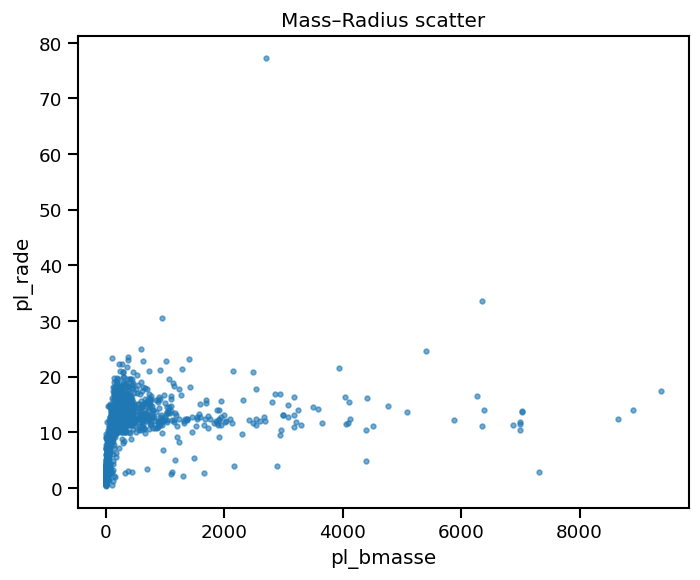

In [39]:
xy = df[[MASS_COL, RAD_COL]].dropna()

plt.figure(figsize=(6,5))
plt.scatter(xy[MASS_COL], xy[RAD_COL], s=8, alpha=0.6)
plt.xlabel(MASS_COL)
plt.ylabel(RAD_COL)
plt.title("Mass–Radius scatter")
plt.tight_layout()


### Optional: log scaling

Mass–radius relations are often easier to see in log space.


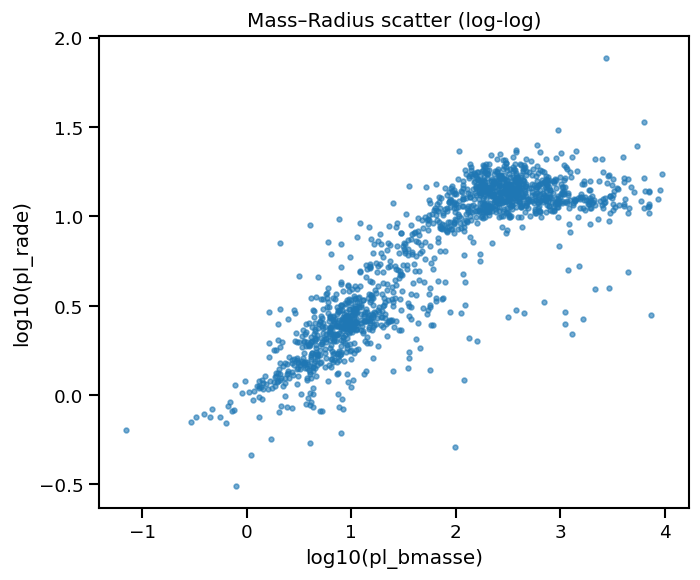

In [40]:
xy_pos = xy[(xy[MASS_COL] > 0) & (xy[RAD_COL] > 0)]

plt.figure(figsize=(6,5))
plt.scatter(np.log10(xy_pos[MASS_COL]), np.log10(xy_pos[RAD_COL]), s=8, alpha=0.6)
plt.xlabel(f"log10({MASS_COL})")
plt.ylabel(f"log10({RAD_COL})")
plt.title("Mass–Radius scatter (log-log)")
plt.tight_layout()


## 8. Adding physical context (color-coding)

If stellar metallicity is available, color-code points.


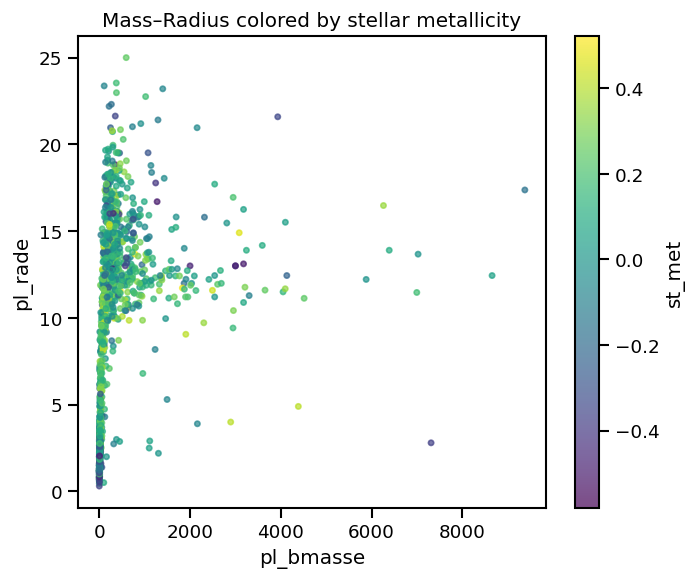

In [41]:
if FEH_COL is None or FEH_COL not in df.columns:
    print("No metallicity column detected (FEH_COL). Skipping this plot.")
else:
    xyz = df[[MASS_COL, RAD_COL, FEH_COL]].dropna()
    plt.figure(figsize=(6,5))
    sc = plt.scatter(xyz[MASS_COL], xyz[RAD_COL], c=xyz[FEH_COL], s=10, alpha=0.7)
    plt.xlabel(MASS_COL)
    plt.ylabel(RAD_COL)
    plt.title("Mass–Radius colored by stellar metallicity")
    plt.colorbar(sc, label=FEH_COL)
    plt.tight_layout()


## 9. Correlations and potential redundancy (diagnosis only)

Correlation matrices can indicate strongly related features, but they do **not** decide what to remove.


In [42]:
num_df = df.select_dtypes(include=[np.number]).copy()
print(f"Numeric columns: {num_df.shape[1]}")


Numeric columns: 11


In [43]:
corr = num_df.corr(numeric_only=True)
corr.shape


(11, 11)

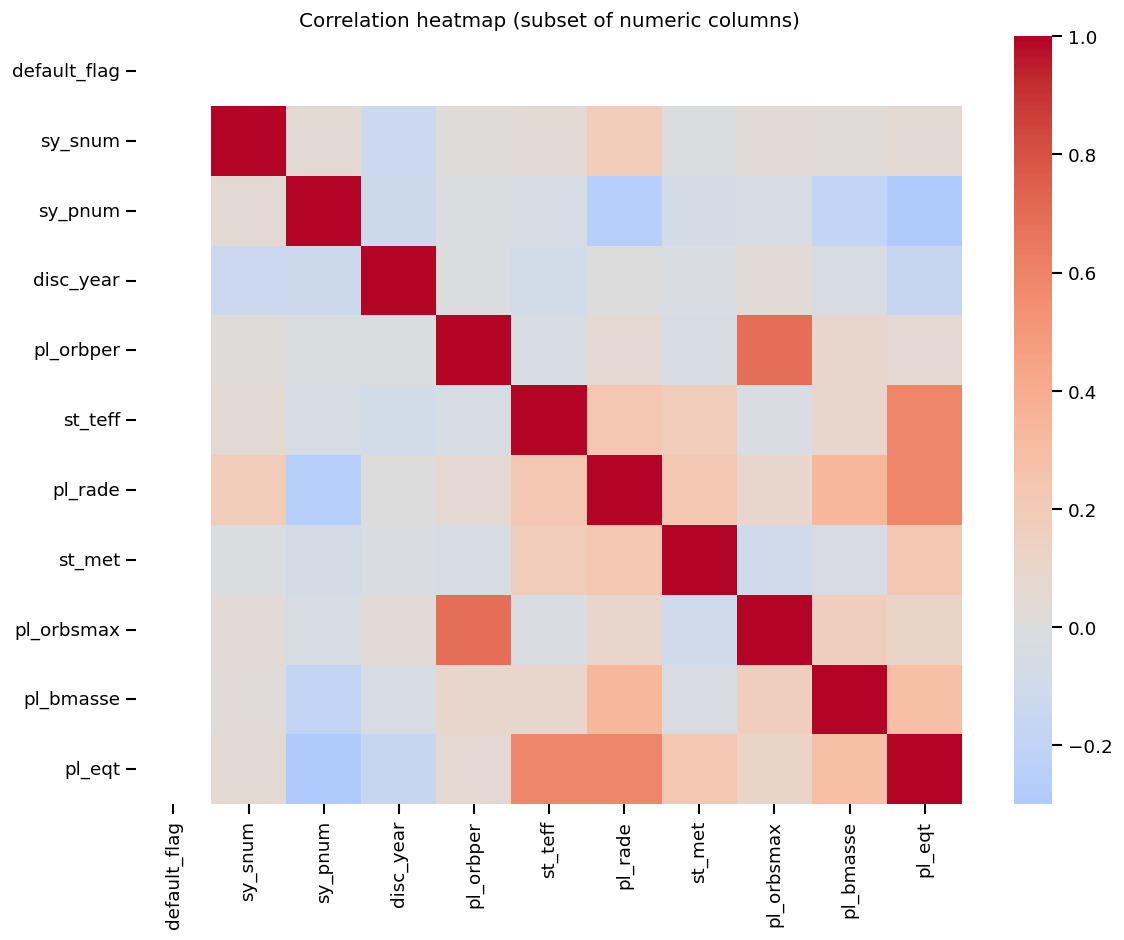

In [44]:
cols_by_missing = num_df.isna().sum().sort_values().index.tolist()
subset_cols = cols_by_missing[:min(20, len(cols_by_missing))]

plt.figure(figsize=(10,8))
sns.heatmap(corr.loc[subset_cols, subset_cols], cmap="coolwarm", center=0)
plt.title("Correlation heatmap (subset of numeric columns)")
plt.tight_layout()


## 10. Outliers: bugs or astrophysics?

Inspect extremes. Discuss whether they are:
- instrumental / pipeline artifacts
- unit issues
- genuinely rare astrophysical objects


In [45]:
df[[MASS_COL, RAD_COL]].sort_values(RAD_COL).head(10)


,pl_bmasse,pl_rade
3943,0.79,0.3098
4696,NaN,0.4000
4094,NaN,0.4030
2896,NaN,0.4300
2122,1.10,0.4600
4095,NaN,0.4970
2767,NaN,0.5100
3440,NaN,0.5100
2077,99.20,0.5100
2517,NaN,0.5200


In [46]:
df[[MASS_COL, RAD_COL]].sort_values(RAD_COL).tail(10)


,pl_bmasse,pl_rade
6055,3.930000,NaN
6056,3.930000,NaN
6057,1.750000,NaN
6058,1.830000,NaN
6059,6547.000000,NaN
6060,218.531000,NaN
6061,629.595000,NaN
6062,1313.220000,NaN
6063,162.092488,NaN
6064,616.904938,NaN


## 11. EDA summary (write short notes)

Answer briefly:
1. What fraction of rows have both mass and radius?
2. Where are the main missing values?
3. Does mass–radius look linear, monotonic, or multi-regime?
4. Which features look strongly correlated?
5. What outliers are suspicious vs interesting?

These notes will guide **feature engineering and regression** in Class 2.


In [47]:
n_total = len(df)
n_mr = df[[MASS_COL, RAD_COL]].dropna().shape[0]
print(f"Rows with both mass and radius: {n_mr}/{n_total} ({n_mr/n_total:.1%})")


Rows with both mass and radius: 1452/6065 (23.9%)
